Importing Dependencies

In [473]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data collection and analysis

In [474]:
#loading dataset from csv file to a pandas dataframe
big_mart_data=pd.read_csv('Train.csv')
test_dataset=pd.read_csv('Test.csv')

In [475]:
#First 5 rows
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [476]:
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [477]:
#number of datapoints and number of features
big_mart_data.shape

(8523, 12)

In [478]:
test_dataset.shape

(5681, 11)

In [479]:
#getting some info about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [480]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Catogorical Features:

Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type   

In [481]:
#checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values:


In [482]:
test_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

mean-> average value,
mode-> most repeated value

In [483]:
#mean value of item weight column
big_mart_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [484]:
test_dataset['Item_Weight'].mean()

np.float64(12.695633368756642)

In [485]:
# filling the missing values in "item_weight" column with the "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

C:\Users\muhammed\AppData\Local\Temp\ipykernel_14492\2362732023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)


In [486]:
test_dataset['Item_Weight'].fillna(test_dataset['Item_Weight'].mean(),inplace=True)

C:\Users\muhammed\AppData\Local\Temp\ipykernel_14492\622970697.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_dataset['Item_Weight'].fillna(test_dataset['Item_Weight'].mean(),inplace=True)


In [487]:
mode_of_outlet_size=big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [488]:
mode_of_outlet_size_test_dataset=test_dataset.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [489]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [490]:
print(mode_of_outlet_size_test_dataset)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [491]:
mode_of_outlet_size = mode_of_outlet_size.loc['Outlet_Size'].to_dict()


In [492]:
mode_of_outlet_size_test_dataset=mode_of_outlet_size_test_dataset.loc['Outlet_Size'].to_dict()

In [493]:
missing_values=big_mart_data['Outlet_Size'].isnull()

In [494]:
missing_values_test=test_dataset['Outlet_Size'].isnull()

In [495]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [496]:
print(missing_values_test)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [497]:
big_mart_data.loc[missing_values, 'Outlet_Size']=big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [498]:
test_dataset.loc[missing_values_test, 'Outlet_Size']=test_dataset.loc[missing_values_test,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [499]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [500]:
test_dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Data Analysis

In [501]:
#stastical measures about the table
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [502]:
test_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Numerical Features

In [503]:
sns.set_theme()

<Figure size 600x600 with 0 Axes>

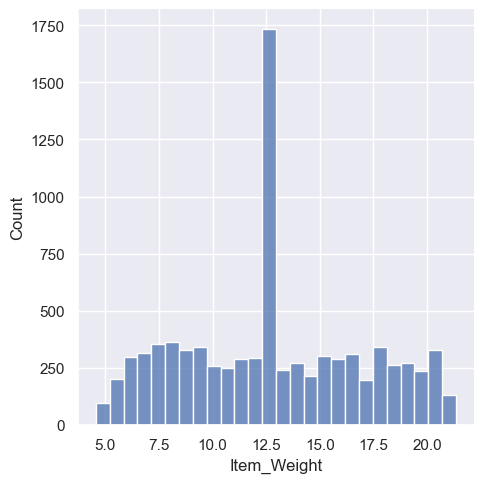

In [504]:
#item weight distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Weight'],)
plt.show()

<Figure size 600x600 with 0 Axes>

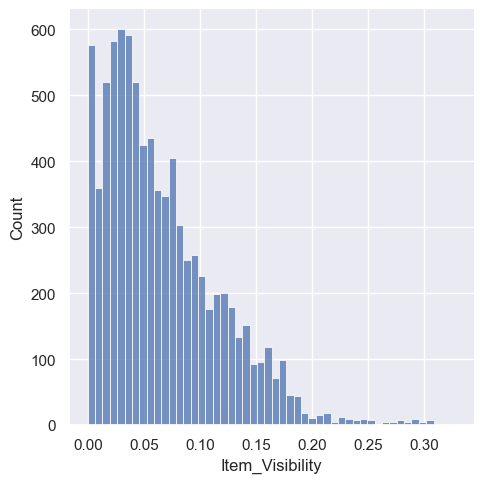

In [505]:
#item visibility distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

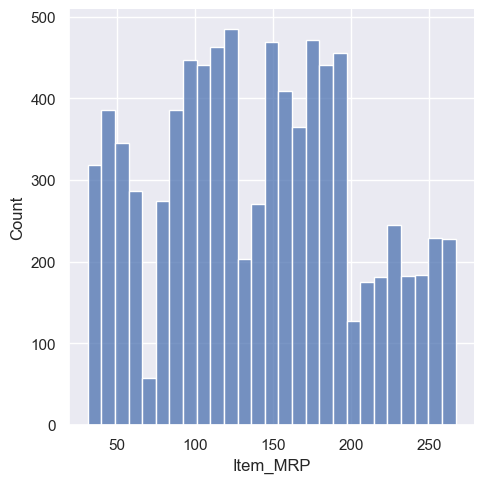

In [506]:
#item MRP distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

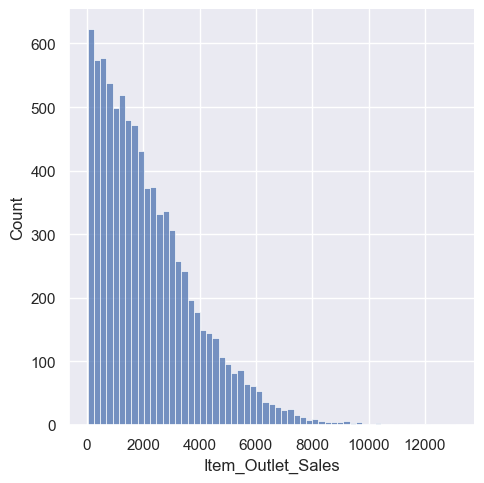

In [507]:
#item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Outlet_Sales'])
plt.show()

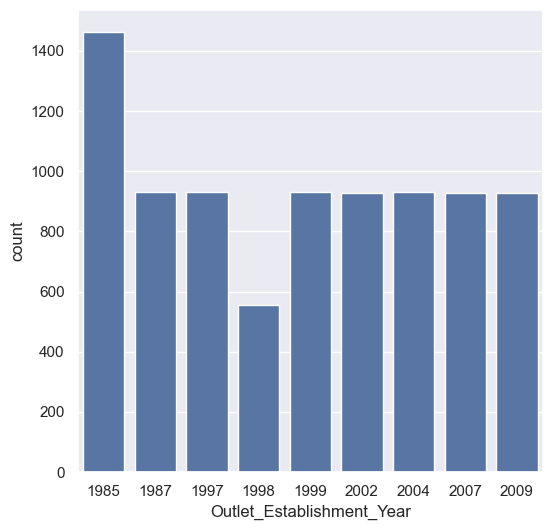

In [508]:
#Outlet establishment_year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

Categorical Features


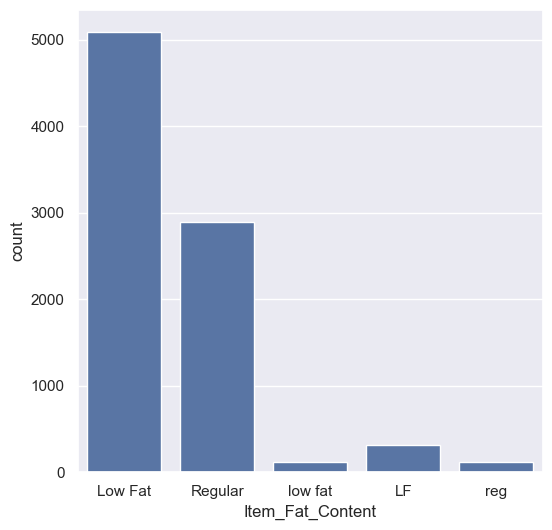

In [509]:
#Item_fat content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

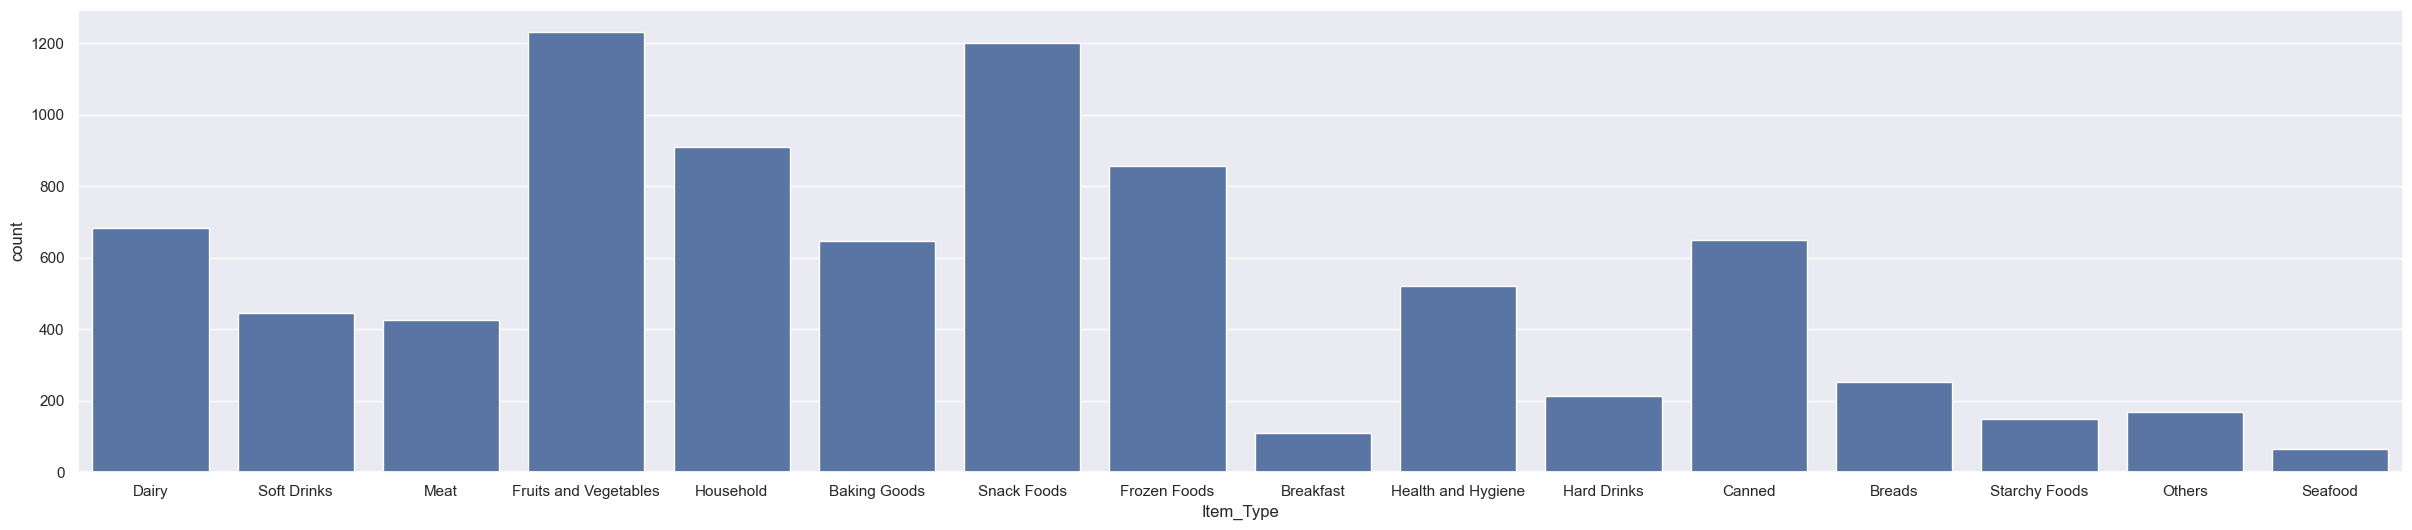

In [510]:
#Item_Type content column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

Data Preprocessing

In [511]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [512]:
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [513]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [514]:
test_dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [515]:
big_mart_data.replace({'Item_Fat_Content':{'low fat': 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}},inplace=True)

In [516]:
test_dataset.replace({'Item_Fat_Content':{'low fat': 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}},inplace=True)

In [517]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [518]:
test_dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

Feature Engineering

Adding new feature named "Outlet_Age". this helps understand how old the store/outlet is and improves model interpretability.

Also Drop "Output_Establishment_Year"

In [519]:
big_mart_data.insert(8,'Outlet_Age',2025-big_mart_data['Outlet_Establishment_Year'])
test_dataset.insert(8,'Outlet_Age',2025-test_dataset['Outlet_Establishment_Year'])

In [520]:
#Droping Outlet_Establishment_Year from both the big_mart_data and test_dataset
big_mart_data.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [521]:
test_dataset.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [522]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,26,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,16,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,26,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,27,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,38,High,Tier 3,Supermarket Type1,994.7052


In [523]:
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,26,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,18,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,27,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,18,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,40,Medium,Tier 3,Supermarket Type3


Label Encoding

In [524]:
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,26,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,18,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,27,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,18,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,40,Medium,Tier 3,Supermarket Type3


In [525]:
encoder=LabelEncoder()

In [526]:
big_mart_data['Item_Identifier']=encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content']=encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type']=encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier']=encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size']=encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type']=encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type']=encoder.fit_transform(big_mart_data['Outlet_Type'])

In [527]:
test_dataset['Item_Identifier']=encoder.fit_transform(test_dataset['Item_Identifier'])
test_dataset['Item_Fat_Content']=encoder.fit_transform(test_dataset['Item_Fat_Content'])
test_dataset['Item_Type']=encoder.fit_transform(test_dataset['Item_Type'])
test_dataset['Outlet_Identifier']=encoder.fit_transform(test_dataset['Outlet_Identifier'])
test_dataset['Outlet_Size']=encoder.fit_transform(test_dataset['Outlet_Size'])
test_dataset['Outlet_Location_Type']=encoder.fit_transform(test_dataset['Outlet_Location_Type'])
test_dataset['Outlet_Type']=encoder.fit_transform(test_dataset['Outlet_Type'])

In [528]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,26,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,16,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,26,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,27,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,38,0,2,1,994.7052


In [529]:
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,26,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,18,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,27,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,18,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,40,1,2,3


Splitting Features and Target

In [530]:
X= big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y= big_mart_data['Item_Outlet_Sales']

In [531]:
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]


In [532]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into training and testing

In [533]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.25,random_state=2)

In [534]:
X_test=test_dataset

In [535]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type
7910,1013,8.27,1,0.089554,13,150.8708,8,28,2,0,1
1537,1185,4.88,1,0.000000,0,53.1298,6,21,2,1,1
5865,75,17.60,0,0.097368,4,89.3856,9,26,1,0,1
4064,723,15.00,1,0.026895,0,220.3456,7,23,2,1,1
2592,734,15.35,0,0.013869,5,62.5168,3,16,1,2,2


In [536]:
print(X.shape,X_train.shape)

(8523, 11) (6392, 11)


In [537]:
print(X_val.shape)

(2131, 11)


In [538]:
print(Y_train.shape)

(6392,)


In [539]:
print(Y_val.shape)

(2131,)


Machine Learning Model Training

In [540]:
regressor=XGBRegressor()

In [541]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

In [542]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [543]:
#R Squared value
r2_train= metrics.r2_score(Y_train, training_data_prediction)

In [544]:
print("R squared value=",r2_train)

R squared value= 0.8775361360993836


In [545]:
#predict on validation set
Validation_data_prediction=regressor.predict(X_val)
r2_val=metrics.r2_score(Y_val,Validation_data_prediction)

In [546]:
print("R squared value=",r2_val)

R squared value= 0.5378225461038342


In [550]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)


In [552]:
print(test_data_prediction)

[1555.5187  1178.3165   470.02222 ... 2003.9594  3873.7583  2038.6727 ]


Using the model's predictions on the test data, we analyze:

- Best-performing outlets
- Top-selling items
- Sales by location type

This helps us understand real-world patterns even without actual sales values.

In [563]:
test_dataset['Predicted_Sales']=regressor.predict(X_test)

Merge into orginal test dataset 

In [566]:
initial_test_dataset=pd.read_csv('Test.csv')
initial_test_dataset['Predicted_Sales']=test_dataset['Predicted_Sales']

In [567]:
initial_test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1555.518677
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1178.316528
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,470.022217
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2725.926758
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6901.831543


In [564]:
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_Sales
0,1103,20.750000,0,0.007565,13,107.8622,9,26,1,0,1,1555.518677
1,1067,8.300000,1,0.038428,4,87.3198,2,18,2,1,1,1178.316528
2,1406,14.600000,0,0.099575,11,241.7538,0,27,2,2,0,470.022217
3,809,7.315000,0,0.015388,13,155.0340,2,18,2,1,1,2725.926758
4,1184,12.695633,1,0.118599,4,234.2300,5,40,1,2,3,6901.831543


Best Performing Outlet

In [568]:
# BEST PERFORMING OUTLET
top_locations=initial_test_dataset.groupby('Outlet_Identifier')['Predicted_Sales'].mean().sort_values(ascending=False).head(5)
print("Top 5 Performing Outlets (AVG predicted Sales):")
print(top_locations)



Top 5 Performing Outlets (AVG predicted Sales):
Outlet_Identifier
OUT027    3625.141846
OUT017    2431.178955
OUT049    2362.496826
OUT035    2351.178711
OUT013    2247.558594
Name: Predicted_Sales, dtype: float32


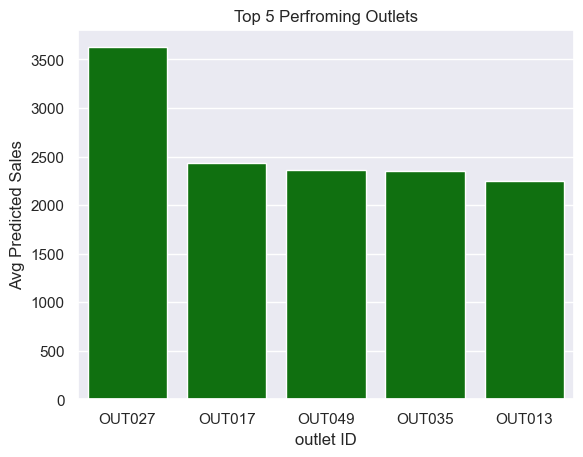

In [569]:
#PLOT for the same
plt.Figure(figsize=(8,4))
sns.barplot(data=top_locations,color='green')
plt.title('Top 5 Perfroming Outlets')
plt.xlabel("outlet ID")
plt.ylabel("Avg Predicted Sales")
plt.show()

The Above Graph gives info about:


This bar chart shows the top 5 outlets with the highest average predicted sales. These outlets are likely located in high-demand areas or have a stronger customer base. BigMart can focus on keeping these outlets well-stocked and optimized for sales.


Top Selling item

In [570]:
#Top Selling Item
top_items=initial_test_dataset.groupby('Item_Identifier')['Predicted_Sales'].mean().sort_values(ascending=False).head(5)
print("Top 5 Selling Items:")
print(top_items)

Top 5 Selling Items:
Item_Identifier
FDK21    6559.481934
NCW30    6271.447266
FDP28    6235.314941
FDY55    6215.870117
NCV53    5858.384766
Name: Predicted_Sales, dtype: float32


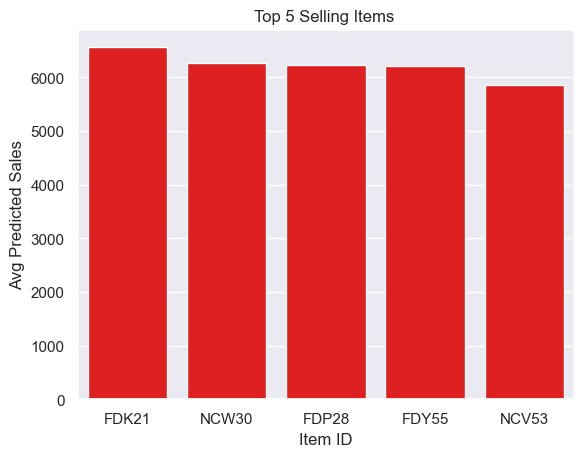

In [575]:
plt.Figure(figsize=(8,4))
sns.barplot(data=top_items,color='red')
plt.title("Top 5 Selling Items ")
plt.xlabel("Item ID")
plt.ylabel("Avg Predicted Sales")
plt.show()

The above Graph shows info about:

This chart displays the items predicted to have the highest sales on average. These items are likely customer favorites or essential goods. BigMart can prioritize promotions or stock management for these high-performing products.

C:\Users\muhammed\AppData\Local\Temp\ipykernel_14492\716753547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Location_Type', y='Predicted_Sales', data=initial_test_dataset, palette='viridis')


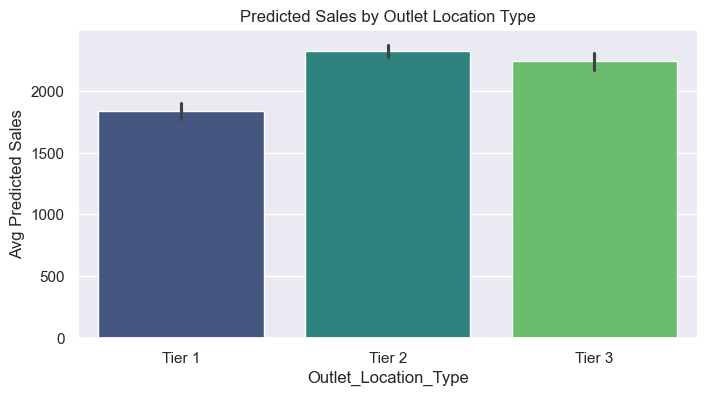

In [572]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Outlet_Location_Type', y='Predicted_Sales', data=initial_test_dataset, palette='viridis')
plt.title("Predicted Sales by Outlet Location Type")
plt.ylabel("Avg Predicted Sales")
plt.show()

The above graph gives info about:


This bar plot compares the predicted average sales across different outlet location types (Tier 1, Tier 2, Tier 3). Outlets in Tier 1 locations tend to perform better, possibly due to higher footfall and purchasing power in urban areas. This insight helps guide regional strategies and resource allocation.